<a href="https://colab.research.google.com/github/dindin666/Sentiment-Analysis-App/blob/main/TF_IDF_Portofolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [ ]:
# Install library Sastrawi
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 01 Data Acquisition

Penjelasan Label
* 0: Ulasan Negatif
* 1: Ulasan Positif



Catatan: Upload Dataset dan Kamus Normalisasi Pada Google Drive Terlebih Dahulu

In [ ]:
# Download dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Salin Path Google Drive di bawah ini
data = pd.read_excel('/content/drive/MyDrive/DataSkripsi/Selection.xlsx')
data.head()

,content,validasi
0,Tolong sediakan CS online di aplikasi untuk me...,0
1,Ini dia baru bgs apk bisa byr disini,1
2,Udah sering belanja di klik indomaret. Kadang ...,0
3,Aplikasi jelek selalu redirect ke lokasi,0
4,Oke,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1563 non-null   object
 1   validasi  1563 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.5+ KB


In [ ]:
y = data['validasi']

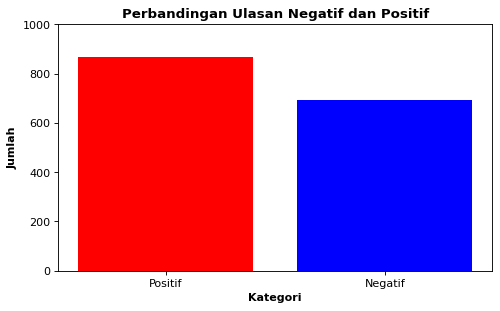

Jumlah Data [0] Negatif	: 694 Data
Jumlah Data [1] Positif	: 869 Data
Total Jumlah Data: 1563 Data


In [ ]:
height = y.value_counts()
labels = ('Positif', 'Negatif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1000)
plt.title('Perbandingan Ulasan Negatif dan Positif', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red', 'blue'])
plt.xticks(y_pos, labels)
plt.show()

print('Jumlah Data [0] Negatif\t:', data[y == 0].shape[0], 'Data')
print('Jumlah Data [1] Positif\t:', data[y == 1].shape[0], 'Data')
print('Total Jumlah Data:', data.shape[0], 'Data')

# 02 Text Preprocessing

## Case Folding

In [ ]:
import re

# Mengubah huruf menjadi lower case
def lower_case(text):
  text = text.lower()
  text = text.strip()
  return text


In [ ]:
raw_sample = data['content'].iloc[26]
data_lower = lower_case(raw_sample)

print('Raw data\t: ', raw_sample)
print('Lower Case\t: ', data_lower)

Raw data	:  Lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Lower Case	:  lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang


##Cleaning

In [ ]:
#Fungsi Data Cleaning
def cleaning(text):
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]',' ', text)               # Menghapus karakter tanda baca
  text = text.strip()
  return text

In [ ]:
raw_sample = data['content'].iloc[26]
cleaning_data = cleaning(data_lower)

print('Case Folding\t: ', data_lower)
print('Cleaning\t: ', cleaning_data)

Case Folding	:  lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Cleaning	:  lama  udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin  beli  produk dr jam  eh jam  baru di konfirmasi gaada  barang


## Word Normalization

In [ ]:
key_norm = pd.read_excel('/content/drive/MyDrive/DataSkripsi/Keynormalisasi.xlsx')
print(key_norm.head(10))

   sebelum   sesudah
0   online    daring
1  problem   masalah
2       jg      juga
3      bgs     bagus
4      apk  aplikasi
5      byr     bayar
6     udah     sudah
7       yg      yang
8     rame     ramai
9      jdi      jadi


In [ ]:
key_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sebelum  917 non-null    object
 1   sesudah  917 non-null    object
dtypes: object(2)
memory usage: 14.5+ KB


In [ ]:
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['sebelum'] == word]['sesudah'].values[0] if (key_norm['sebelum'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

raw_data = data['content'].iloc[26]
data_lower = lower_case(raw_sample)
cleaning_data = cleaning(data_lower)
normalize = text_normalize(cleaning_data)

print('Raw Data\t: ', raw_data)
print('Lower Case\t: ', data_lower)
print('Clean Data\t: ', cleaning_data)
print('Normalize\t: ', normalize)

Raw Data	:  Lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Lower Case	:  lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Clean Data	:  lama  udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin  beli  produk dr jam  eh jam  baru di konfirmasi gaada  barang
Normalize	:  lama sudah pesan menunggu lama tidak datang sudah di surat elektronik juga tetap lama tidak bisa di batalkan beli produk dari jam eh jam baru di konfirmasi tidak ada barang


## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal
# Tambahkan kata lain dalam daftar stopword

more_stopword = ['nih', 'sih', 'hadeuh', 'haduh', 'ya',	'yeah',	'yng',	'youu',	'yt'	'yuhuu', 'yaah',
                 'wkwkwk',	'woii',	'woilaaaah',	'woku',	'wongsorejo', 'woyyyy',	'xxxxg',	'yt',	'yuhuu',
                 'afavx', 'ah', 'wet',	'wi',	'wkwk','aap', 'wat', 'lot','nya','eh','ahabhj',	'ahakcf','woke',
                 'yg','yummy','aibkwq','no','wahaha','yah', 'yaw','wahh']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = data['content'].iloc[26]
data_lower = lower_case(raw_sample)
cleaning_data = cleaning(data_lower)
normalize = text_normalize(cleaning_data)
stopword_removal = remove_stop_words(normalize)

print('Raw data\t\t: ', raw_sample)
print('Case Folding\t\t: ', data_lower)
print('Cleaning\t\t: ', cleaning_data)
print('Normalisasi\t\t: ', normalize)
print('Stopwords Removal\t: ', stopword_removal)

Raw data		:  Lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Case Folding		:  lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Cleaning		:  lama  udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin  beli  produk dr jam  eh jam  baru di konfirmasi gaada  barang
Normalisasi		:  lama sudah pesan menunggu lama tidak datang sudah di surat elektronik juga tetap lama tidak bisa di batalkan beli produk dari jam eh jam baru di konfirmasi tidak ada barang
Stopwords Removal	:  pesan menunggu surat elektronik batalkan beli produk jam jam konfirmasi barang


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = data['content'].iloc[26]
data_lower = lower_case(raw_sample)
cleaning_data = cleaning(data_lower)
normalize = text_normalize(cleaning_data)
stopword_removal = remove_stop_words(normalize)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', data_lower)
print('Cleaning\t\t: ', cleaning_data)
print('Normalisasi\t\t: ', normalize)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  Lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Case folding		:  lama, udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin, beli 4 produk dr jam 12 eh jam 3 baru di konfirmasi gaada 1 barang
Cleaning		:  lama  udah psn nungguin lama gk dtg udah di email juga ttp lamaa gabisa di batalin  beli  produk dr jam  eh jam  baru di konfirmasi gaada  barang
Normalisasi		:  lama sudah pesan menunggu lama tidak datang sudah di surat elektronik juga tetap lama tidak bisa di batalkan beli produk dari jam eh jam baru di konfirmasi tidak ada barang
Stopword removal	:  pesan menunggu surat elektronik batalkan beli produk jam jam konfirmasi barang
Stemming		:  pesan tunggu surat elektronik batal beli produk jam jam konfirmasi barang


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = cleaning(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
%%time
data['clean_teks'] = data['content'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 2min 24s, sys: 442 ms, total: 2min 25s
Wall time: 2min 44s


In [ ]:
data

,content,validasi,clean_teks
0,Tolong sediakan CS online di aplikasi untuk me...,0,tolong sedia cs daring aplikasi selesai surat ...
1,Ini dia baru bgs apk bisa byr disini,1,bagus aplikasi bayar
2,Udah sering belanja di klik indomaret. Kadang ...,0,udah belanja klik indomaret kadang sukses kada...
3,Aplikasi jelek selalu redirect ke lokasi,0,aplikasi jelek arah lokasi
4,Oke,1,oke
...,...,...,...
1558,Terlalu sering update aplikasi. Memenuhi memory,0,baru aplikasi penuh memori
1559,Kapan pembayaran bisa pakai gopay? Daerah saya...,1,bayar pakai gopay daerah klik indomaret ambil ...
1560,"Sangat cepat, barang aman sampai tujuan gak ad...",1,cepat barang aman tuju cacat kurir ramah sopan...
1561,Solusi cepat dan hemat,1,solusi cepat hemat


In [ ]:
# Simpan data yang telah melalui text preprocessing agar kita tidak perlu menjalankan proses tersebut mulai awal (Opsional)
data.to_csv('clean_data.csv')

# 03 Feature Engineering

In [ ]:
# Pisahkan kolom fitur dan target
X = data['clean_teks']
y = data['validasi']

In [ ]:
X

0       tolong sedia cs daring aplikasi selesai surat ...
1                                    bagus aplikasi bayar
2       udah belanja klik indomaret kadang sukses kada...
3                              aplikasi jelek arah lokasi
4                                                     oke
                              ...                        
1558                           baru aplikasi penuh memori
1559    bayar pakai gopay daerah klik indomaret ambil ...
1560    cepat barang aman tuju cacat kurir ramah sopan...
1561                                   solusi cepat hemat
1562                                                bagus
Name: clean_teks, Length: 1563, dtype: object

In [ ]:
y

0       0
1       1
2       0
3       0
4       1
       ..
1558    0
1559    1
1560    1
1561    1
1562    1
Name: validasi, Length: 1563, dtype: int64

## Feature Extraction (TF-IDF)
Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
# Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names_out()))

1709


In [ ]:
# Melihat fitur-fitur apa saja yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['abal' 'abang' 'acara' ... 'wifi' 'wilayah' 'wita']


In [ ]:
# Melihat matriks jumlah token
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Melihat matriks jumlah token menggunakan TF IDF
# Data ini siap untuk dimasukkan dalam proses pemodelan (machine learning)

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,abal,abang,acara,ada,adab,adakan,agam,air,ajaib,ajar,...,voucher,wa,warga,warung,web,whatsapp,wib,wifi,wilayah,wita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# 04 Modelling (Machine Learning)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split    # Digunakan untuk memisahkan data uji dan data latih #To split dataset
from joblib import dump                                 # Digunakan untuk menyimpan model yang telah dilatih #To save the model

In [ ]:
# Proses memisahkan data uji dan data latih # Split data train and data test
# Random_state digunakan untuk internal random generator # Random generator using random_state

X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2, random_state=42)

In [ ]:
num_train_data = len(X_train)
num_test_data = len(X_test)

print("Jumlah data training:", num_train_data)
print("Jumlah data testing:", num_test_data)

Jumlah data training: 1250
Jumlah data testing: 313


Ubah kernel sesuai kebutuhan

### Linear
kernel="linear", C=1

### Polynomial:
kernel="poly", gamma="scale", C=1, coef0=(0.0), degree=3

### Sigmoid:
kernel="sigmoid", gamma="scale", C=1, coef0=(0.0)

### RBF
kernel="rbf", gamma="scale", C=1



In [ ]:
# Training the model
algorithm = SVC(kernel="rbf", gamma="scale", C=1)   # Load algoritma pembelajaran
model = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritma pada data latih & label latih

# Simpan model hasil traning
dump(model, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
# Gunakan model yang telah di latih untuk memprediksi label pada data uji
model_pred = model.predict(X_test)

# Tampilkan hasil prediksi label dari model
model_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
# Tampilkan label sebenarnya pada data uji (actual label)
y_test

527     0
271     1
1400    0
1201    0
59      0
       ..
208     1
970     1
1113    0
483     1
58      0
Name: validasi, Length: 313, dtype: int64

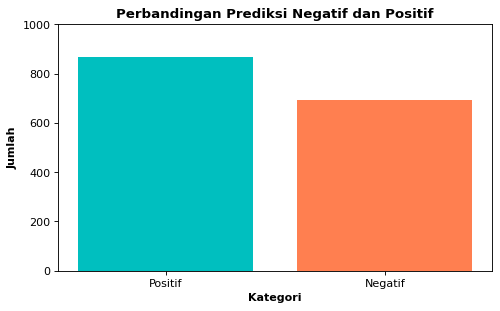

Jumlah Data [0] Negatif	: 694 Data
Jumlah Data [1] Positif	: 869 Data
Total Jumlah Data: 1563 Data


In [ ]:
height = y.value_counts()
labels = ('Positif', 'Negatif')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1000)
plt.title('Perbandingan Prediksi Negatif dan Positif', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['c', 'coral'])
plt.xticks(y_pos, labels)
plt.show()

print('Jumlah Data [0] Negatif\t:', data[y == 0].shape[0], 'Data')
print('Jumlah Data [1] Positif\t:', data[y == 1].shape[0], 'Data')
print('Total Jumlah Data:', y.shape[0], 'Data')

# 05 Model Evaluation

In [ ]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 280
Jumlah prediksi salah	: 33
Akurasi pengujian	: 89.45686900958466 %


Confusion matrix:
 [[130  16]
 [ 17 150]]


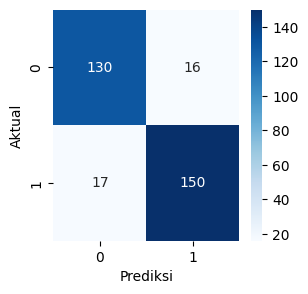

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

# Buat heatmap confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       146
           1       0.90      0.90      0.90       167

    accuracy                           0.89       313
   macro avg       0.89      0.89      0.89       313
weighted avg       0.89      0.89      0.89       313



# 07 WordCloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
print('Total Jumlah Komentar:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Negative\t:', data[y == 0].shape[0], 'data')
print('-- [1] Positive\t:', data[y == 1].shape[0], 'data')

Total Jumlah Komentar: 1563 data

terdiri dari (label):
-- [0] Negative	: 694 data
-- [1] Positive	: 869 data


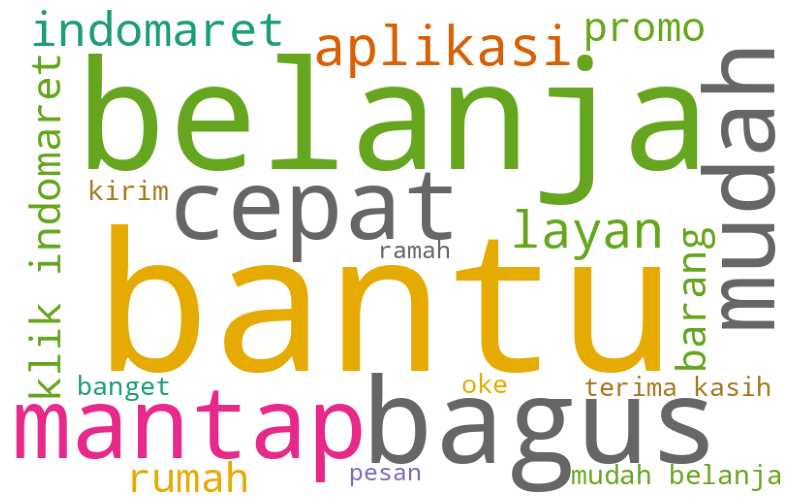

In [ ]:
# WordCloud Positif

positif = data[data.validasi == 1]
positif_string = []

for t in positif.clean_teks:
  positif_string.append(t)

positif_string = pd.Series(positif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      contour_width=10, contour_color='firebrick',
                      max_words=500).generate(positif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

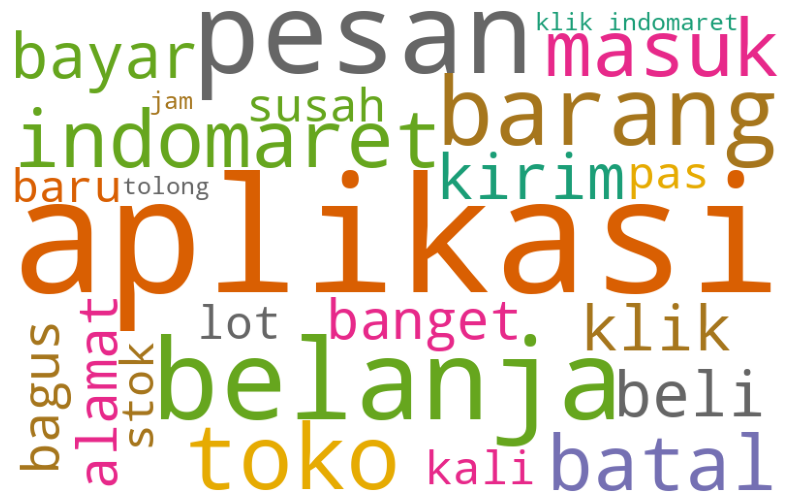

In [ ]:
# WordCloud Negatif

negatif = data[data.validasi == 0]
negatif_string = []

for t in negatif.clean_teks:
  negatif_string.append(t)

negatif_string = pd.Series(negatif_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      contour_width=10, contour_color='firebrick',
                      max_words=500).generate(negatif_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()